# Medical Costs Prediction - Linear Regression

**Objective**: Build a linear regression model to predict medical charges based on patient characteristics.

## Loading the Dataset

**Importing necessary libraries:**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('frais_medicaux.txt')

print("Data Overview:")
print(df.head())
print(f"\nNumber of rows: {len(df)}")


Data Overview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Number of rows: 1338


## Exploratory Data Analysis (EDA)

In [3]:
print("Dataset Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values Check:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.0000

In [4]:
print("\nSex:")
print(df['sex'].value_counts())
print("\nSmoker:")
print(df['smoker'].value_counts())
print("\nRegion:")
print(df['region'].value_counts())


Sex:
sex
male      676
female    662
Name: count, dtype: int64

Smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


+ Balanced distribution for sex and regions. Imbalance for smokers (20% of the sample).

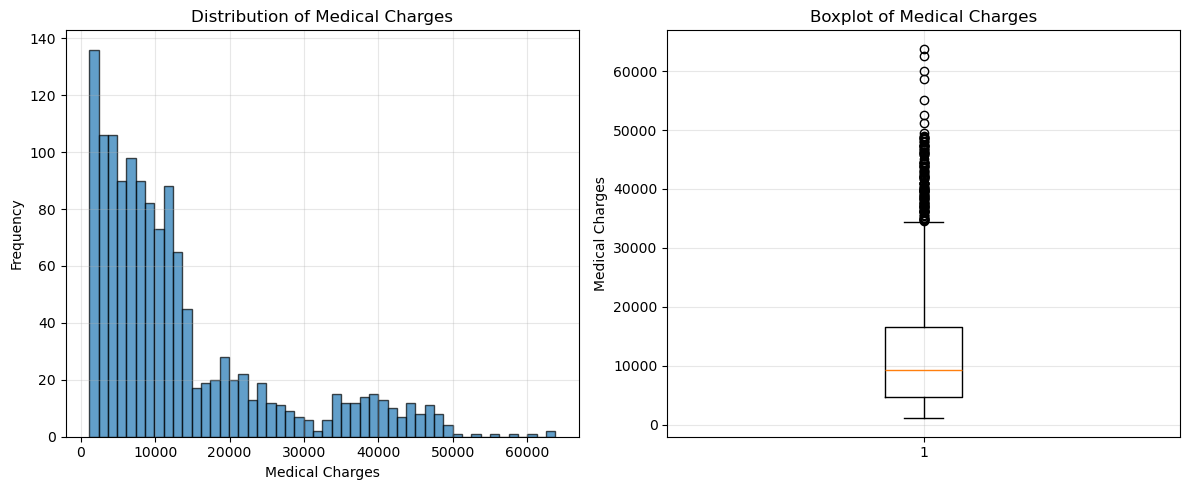

Mean charges: 13270.42
Median charges: 9382.03


In [5]:
# Visualization of charges distribution (target variable)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Medical Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Charges')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['charges'])
plt.ylabel('Medical Charges')
plt.title('Boxplot of Medical Charges')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean charges: {df['charges'].mean():.2f}")
print(f"Median charges: {df['charges'].median():.2f}")

##### Visualization of relationships between variables:

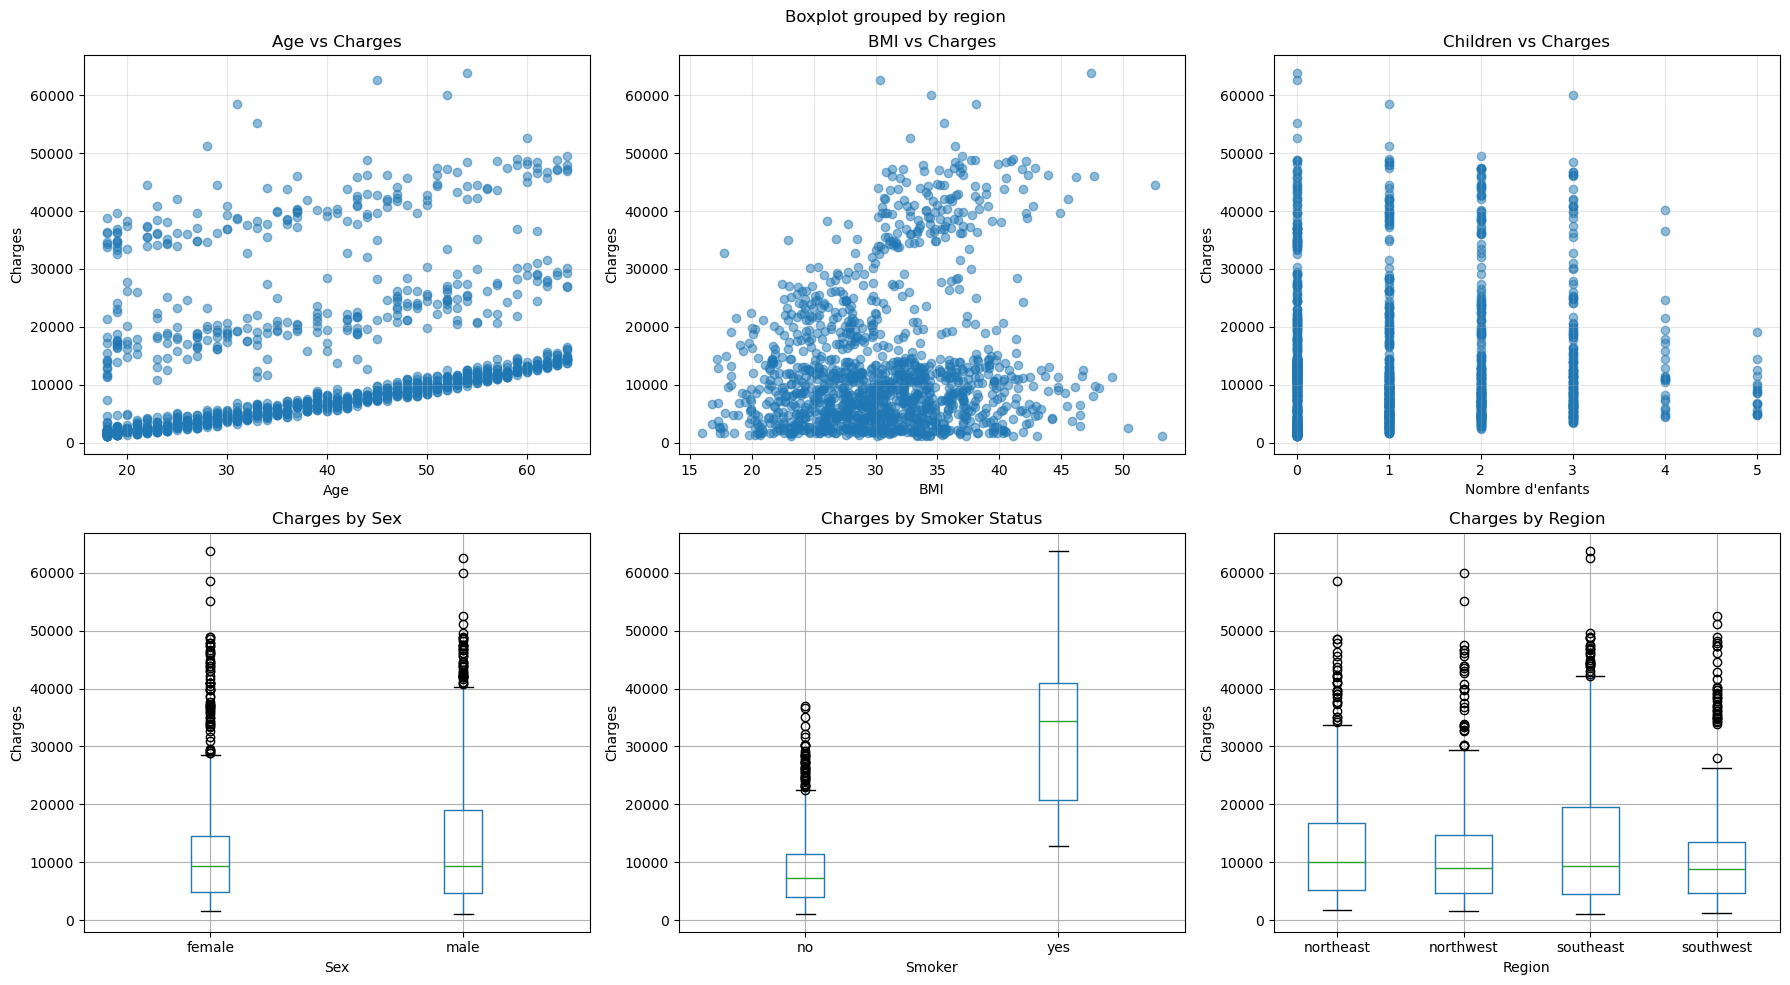

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age vs Charges
axes[0, 0].scatter(df['age'], df['charges'], alpha=0.5)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges')
axes[0, 0].set_title('Age vs Charges')
axes[0, 0].grid(True, alpha=0.3)

# BMI vs Charges
axes[0, 1].scatter(df['bmi'], df['charges'], alpha=0.5)
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges')
axes[0, 1].set_title('BMI vs Charges')
axes[0, 1].grid(True, alpha=0.3)

# Children vs Charges
axes[0, 2].scatter(df['children'], df['charges'], alpha=0.5)
axes[0, 2].set_xlabel('Nombre d\'enfants')
axes[0, 2].set_ylabel('Charges')
axes[0, 2].set_title('Children vs Charges')
axes[0, 2].grid(True, alpha=0.3)

# Charges by Sex
df.boxplot(column='charges', by='sex', ax=axes[1, 0])
axes[1, 0].set_title('Charges by Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Charges')

# Charges par fumeur
df.boxplot(column='charges', by='smoker', ax=axes[1, 1])
axes[1, 1].set_title('Charges by Smoker Status')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Charges')

# Charges by Region
df.boxplot(column='charges', by='region', ax=axes[1, 2])
axes[1, 2].set_title('Charges by Region')
axes[1, 2].set_xlabel('Region')
axes[1, 2].set_ylabel('Charges')

plt.tight_layout()
plt.show()

- **Scatter plots**: Age shows a positive trend with charges (increases with age). BMI shows a less clear relationship with significant dispersion. The number of children shows no obvious relationship with charges.
- **Boxplots**: Smokers have significantly higher medical charges than non-smokers (major visible difference). Sex shows little difference between men and women. Regions show similar distributions with negligible variations.

## Correlation Analysis Between Variables

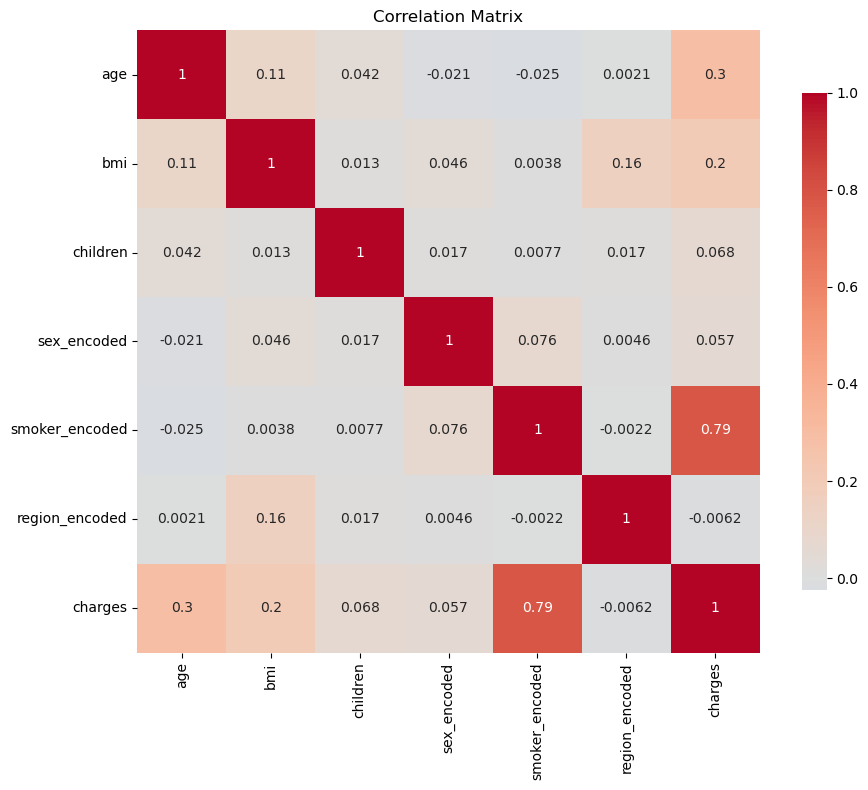

In [7]:
# Encoding for correlation
df_temp = df.copy()
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_temp['sex_encoded'] = le_sex.fit_transform(df_temp['sex'])
df_temp['smoker_encoded'] = le_smoker.fit_transform(df_temp['smoker'])
df_temp['region_encoded'] = le_region.fit_transform(df_temp['region'])


corr_matrix = df_temp[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 
                       'region_encoded', 'charges']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

+ The correlation matrix reveals that smoker status (smoker_encoded) has the strongest correlation with charges (value close to 0.8), confirming its major role.
+ Age shows a moderate positive correlation (approximately 0.3) with charges.
+ BMI shows a weak to moderate correlation (0.2).
+ Other variables (sex, children, region) have very weak correlations with charges. No high multicollinearity is detected between explanatory variables, which is favorable for the linear regression model.

## Preprocessing and Encoding of Categorical Variables

In [8]:
df_model = df.copy()

# Sex: female=0, male=1
df_model['sex'] = df_model['sex'].map({'female': 0, 'male': 1})

# Smoker: no=0, yes=1
df_model['smoker'] = df_model['smoker'].map({'no': 0, 'yes': 1})

# Region: encodage one-hot
df_model = pd.get_dummies(df_model, columns=['region'], prefix='region')

print("Data Overview After Preprocessing:")
print(df_model.head())
print("\nColumns:", df_model.columns.tolist())

Data Overview After Preprocessing:
   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061             False   
4   32    1  28.880         0       0   3866.85520             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


**Encoding Justification**: Binary encoding for sex and smoker (2 categories, no order). One-hot encoding for region (4 nominal categories without natural order, avoids imposing an order).

## Separating Explanatory Variables (X) and Target Variable (y)

In [9]:
X = df_model.drop('charges', axis=1)
y = df_model['charges']

print("Features (X):")
print(X.head())
print(f"\nShape of X: {X.shape}")
print(f"\nTarget Variable (y):")
print(y.head())
print(f"Shape of y: {y.shape}")

Features (X):
   age  sex     bmi  children  smoker  region_northeast  region_northwest  \
0   19    0  27.900         0       1             False             False   
1   18    1  33.770         1       0             False             False   
2   28    1  33.000         3       0             False             False   
3   33    1  22.705         0       0             False              True   
4   32    1  28.880         0       0             False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

Shape of X: (1338, 9)

Target Variable (y):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
Shape of y: (1338,)


## Splitting Data into Training and Test Sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Train/test proportion: {X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]):.2%} / {X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]):.2%}")

Training set size: 1070 samples
Test set size: 268 samples
Train/test proportion: 79.97% / 20.03%


## Creating and Training the Linear Regression Model

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"\nModel Coefficients:")
for i, col in enumerate(X.columns):
    print(f"  {col}: {model.coef_[i]:.2f}")
print(f"\nIntercept: {model.intercept_:.2f}")


Model Coefficients:
  age: 256.98
  sex: -18.59
  bmi: 337.09
  children: 425.28
  smoker: 23651.13
  region_northeast: 459.59
  region_northwest: 88.91
  region_southeast: -198.28
  region_southwest: -350.21

Intercept: -12390.80


**Interpretation**: The smoker coefficient (23651.13) is by far the highest, confirming its major impact on charges. Age (256.98), BMI (337.09), and children (425.28) have moderate positive impacts. Sex (-18.59) has a weak negative impact. Regions show variable impacts. The intercept (-12390.80) represents the base value of charges.


## Prediction and Model Performance Evaluation

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("MODEL EVALUATION METRICS")
print(f"\nTraining Set:")
print(f"  MSE (Mean Squared Error): {train_mse:.2f}")
print(f"  RMSE (Root Mean Squared Error): {train_rmse:.2f}")
print(f"  MAE (Mean Absolute Error): {train_mae:.2f}")
print(f"  R² (Coefficient of Determination): {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  MSE (Mean Squared Error): {test_mse:.2f}")
print(f"  RMSE (Root Mean Squared Error): {test_rmse:.2f}")
print(f"  MAE (Mean Absolute Error): {test_mae:.2f}")
print(f"  R² (Coefficient of Determination): {test_r2:.4f}")


MODEL EVALUATION METRICS

Training Set:
  MSE (Mean Squared Error): 37277681.70
  RMSE (Root Mean Squared Error): 6105.55
  MAE (Mean Absolute Error): 4208.23
  R² (Coefficient of Determination): 0.7417

Test Set:
  MSE (Mean Squared Error): 33596915.85
  RMSE (Root Mean Squared Error): 5796.28
  MAE (Mean Absolute Error): 4181.19
  R² (Coefficient of Determination): 0.7836


**MSE**: Mean of squared errors. Heavily penalizes large errors.

**RMSE**: Square root of MSE. Same unit as the target variable, therefore more interpretable.

**MAE**: Mean of absolute errors. Gives an idea of the average error.

**R²**: Proportion of explained variance (between 0 and 1). Closer to 1 means better model performance.


### Results Interpretation

**R²**: 0.7417 (train) / 0.7836 (test): The model explains 74% of the variance on training and 78% on test. The higher R² on test indicates good generalization without overfitting. Decent performance but can be improved.

## Visualization of Predictions vs Actual Values

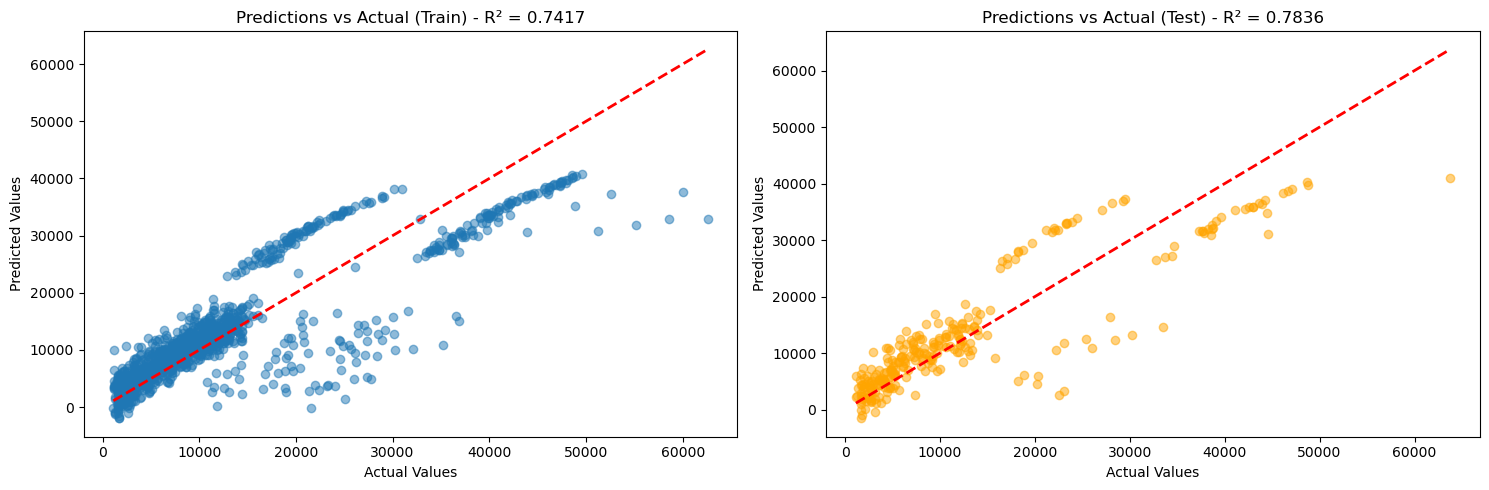

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Predictions vs Actual (Train) - R² = {train_r2:.4f}')

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Predictions vs Actual (Test) - R² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

## Feature Importance Analysis

Feature Importance (by absolute coefficient value):
            Feature   Coefficient  Abs_Coefficient
4            smoker  23651.128856     23651.128856
5  region_northeast    459.585244       459.585244
3          children    425.278784       425.278784
8  region_southwest   -350.214110       350.214110
2               bmi    337.092552       337.092552
0               age    256.975706       256.975706
7  region_southeast   -198.279052       198.279052
6  region_northwest     88.907918        88.907918
1               sex    -18.591692        18.591692


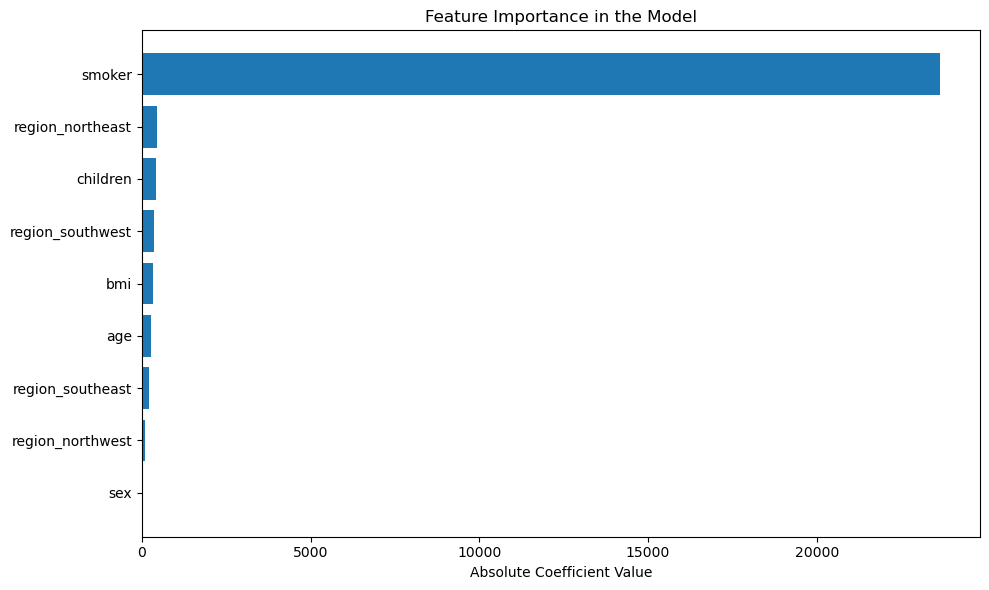

In [14]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (by absolute coefficient value):")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in the Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Concrete Prediction Examples

In [15]:
# Select a few examples from the test set
sample_indices = np.random.choice(X_test.index, size=3, replace=False)

for idx in sample_indices:
    original_data = df.loc[idx]
    prediction = model.predict(X_test.loc[[idx]])[0]
    actual = y_test.loc[idx]
    
    print(f"\nExample {idx}:")
    print(f"  Age: {original_data['age']}, Sex: {original_data['sex']}, BMI: {original_data['bmi']:.2f}")
    print(f"  Children: {original_data['children']}, Smoker: {original_data['smoker']}, Region: {original_data['region']}")
    print(f"  Actual Charge: ${actual:.2f}")
    print(f"  Predicted Charge: ${prediction:.2f}")
    print(f"  Error: ${abs(actual - prediction):.2f}")


Example 289:
  Age: 52, Sex: male, BMI: 26.40
  Children: 3, Smoker: no, Region: southeast
  Actual Charge: $25992.82
  Predicted Charge: $10930.14
  Error: $15062.68

Example 210:
  Age: 20, Sex: male, BMI: 33.00
  Children: 1, Smoker: no, Region: southwest
  Actual Charge: $1980.07
  Predicted Charge: $3929.24
  Error: $1949.17

Example 654:
  Age: 59, Sex: female, BMI: 35.20
  Children: 0, Smoker: no, Region: southeast
  Actual Charge: $12244.53
  Predicted Charge: $14438.14
  Error: $2193.61
